<a href="https://colab.research.google.com/github/supsi-dacd-isaac/TeachDecisionMakingUncertainty/blob/main/L02/Modelling_examples_cvxhull_sets_parametric_non_parametric_prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uncertainty models

This Colab notebook provides an introduction to uncertainty modeling, covering both aleatoric and epistemic uncertainty. It will explore parametric approaches such as univariate Gaussian models and Gaussian mixture models, as well as non-parametric methods like kernel density estimation. Additionally, epistemic uncertainty is demonstrated using techniques like convex hulls and data-enclosing disks.

Specifically we will see:

## Aleatoric uncertainty, modelling examples (parametric):
- Gaussian univariate
- Gaussian mixture model
    - univariate
    - bivariate
  
## Aleatoric uncertainty, modelling examples (non-parametric):
  - Kernel density estimator


## Epistemic uncertainty, modelling examples:
  - Convex hull
  - Data enclosing disk


In [1]:
# Here we import useful packages and methods

# math and statistical tools
import numpy as np
import math
from scipy.stats import norm
import scipy.stats as stats
import numpy.random as random

# tools for visualization and plotting
import seaborn as sns
import matplotlib.pyplot as plt

### **A univariate unimodal parametric (Gaussian) Model**
This example demonstrates a simple univariate Gaussian distribution, where data is modeled using a normal distribution with a given mean and standard deviation.

The implementation includes methods for computing the probability density function (PDF), cumulative distribution function (CDF), inverse CDF (quantile function), and sampling (generating scenarios for our random variables) using inverse transform sampling.

In [2]:
# Example 1: Gaussian
class Gaussian:
  """A simple univariate Gaussian model f(x) = N(mean,sigma)"""

  def __init__(self, mu, sigma):  # Initialize model and parameters
      self.sigma = sigma
      self.dist = norm(loc=self.mu, scale=self.sigma)

  def pdf(self, x):  # PDF
      return (1 / (self.sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - self.mu) / self.sigma) ** 2)

  def cdf(self, x): # CDF
      return 0.5 * (1 + np.vectorize(math.erf)((x - self.mu) / (self.sigma * np.sqrt(2))))

  def icdf(self, alpha): # inverse CDF
      return self.dist.ppf(alpha)


  def sample(self, n_samples): # Sampling approach
          # 1. sample alpha as Uniform[0,1]
          # 2. then inverse CDF for alpha
          alpha_vals = np.random.uniform(0, 1, n_samples)
          return self.icdf(alpha_vals)

### **Gaussian Mixture Model: a univariate multimodal parametric model**


This example extends the Gaussian model by combining multiple Gaussian components into a mixture model.

The GMM represents data as a weighted sum of several Gaussian distributions, capturing more complex distributions than a single Gaussian.

The implementation includes methods for computing the PDF, CDF, and sampling from the mixture by selecting a component based on its weight.

In [3]:
# Example 2: Gaussian Mixture Model (GMM)
class GaussianMixtureModel:
    """ A simple GMM.See other packages (e.g. sklearn, etc) for more complete implementations"""

    def __init__(self, components, weights):
        self.components = components  # List of Gaussians
        if sum(weights)==1:
          self.weights = weights
        else:
          self.weights = weights/sum(weights) # Normalize weights

    def pdf(self, x): # PDF
        result = np.zeros_like(x)
        for weight, component in zip(self.weights, self.components):
            result += weight * component.pdf(x)
        return result

    def cdf(self, x): # CDf
        result = np.zeros_like(x)
        for weight, component in zip(self.weights, self.components):
            result += weight * component.cdf(x)
        return result

    def sample(self, n_samples): # Sampling approach...take one sample from randomly chosen gaussian component
        samples = []
        for _ in range(n_samples):
            component = np.random.choice(self.components, p=self.weights)
            sample = component.sample(1)
            samples.append(sample[0])
        return np.array(samples)


## 📝 To-Do List: Implementing a Univariate Gaussian Mixture Model (GMM)

### 1️⃣ Define a Univariate GMM with 3 Components  
- Use the given **mean values**: `[0, 5, -3]`  
- Use the given **standard deviations**: `[1, 2, 0.5]`  
- Assign **weights** ensuring they sum to 1: `[1/3, 1/3, 1/3]`  
- Create the `GMM3` model using these parameters.  

### 2️⃣ Generate Samples from the GMM  
- Draw `n_samples = 1000` from `GMM3`.  

### 3️⃣ Visualize the Results  
- 📌 **Plot the Individual Gaussian Components**: Overlay their probability density functions (PDFs).  
- 📌 **Plot the GMM PDF and Histogram**: Show how the mixture model approximates the data distribution.  
- 📌 **Plot the CDF**: Compare the cumulative distribution of `GMM3` with the empirical distribution of the samples.  

---

## 📊 Visualization Example
```python
x = np.linspace(-10, 10, 1000)
plt.figure(figsize=(10, 6))
for component, weight in zip(GMM3.components, GMM3.weights):
    plt.plot(x, component.pdf(x), label=f'Gaussian Component (mu={component.mu}, sigma={component.sigma})')



In [4]:
# TO-DO:
# Define a univariate GMM with 3 Gaussian components (GMM3)
# mean values of the components [0 ,5, -3]
# standard deviation of the components [1, 2, 0.5]

# Select weights such that sum(w) = 1
weights = [1/3, 1/3, 1/3]  # Sum to 1
GMM3 = []

# sample data from the GMM
n_samples = 1000
samples = []

# Visualize:
# 1. Plot the individual components
# 2. Plot the PDF and histogram
# 3. Plot the CDF


## 📌 Visualizing Epistemic sets $\mathcal{U}$

This plot compares unit circles under different norm definitions in a 2D plane:  

- **$L_1$ Norm (Manhattan Distance)** → Dashed **blue** contour  
- **$L_2$ Norm (Euclidean Distance)** → Dotted **green** contour  
- **$L_∞$ Norm (Maximum Distance)** → Solid **red** contour  
- **Ellipsoidal Set** → Solid **black** contour  

Each contour represents points where the respective norm equals 1. This visualization helps in understanding geometric differences between norms.  


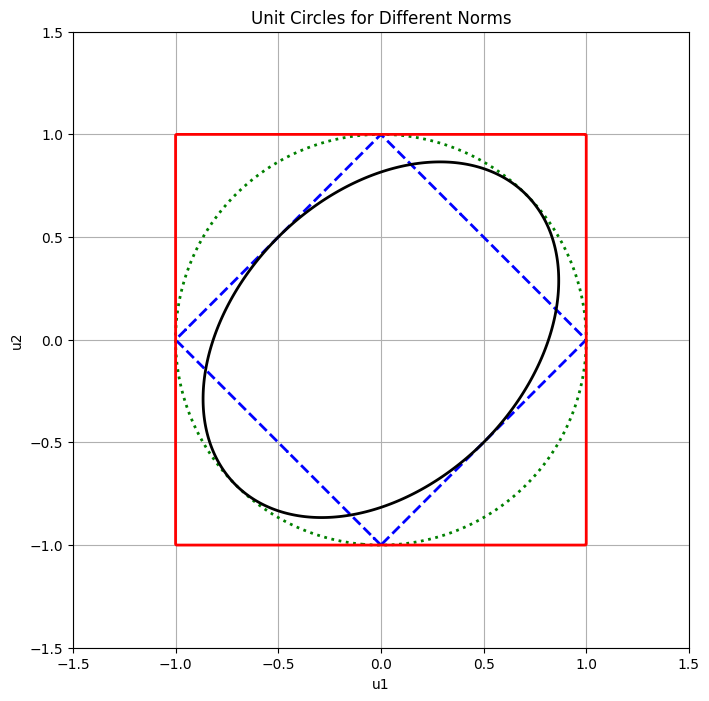

In [24]:
# Create a grid of points in the 2D plane
x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-1.5, 1.5, 400)
X, Y = np.meshgrid(x, y)

# Calculate the norms for each point in the grid
norm1 = np.abs(X) + np.abs(Y)
norm2 = np.sqrt(X**2 + Y**2)
norminf = np.maximum(np.abs(X), np.abs(Y))
elipsoidal_set = np.sqrt(1.5*X**2 + 1.5*Y**2 - X*Y)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the unit circles for each norm
ax.contour(X, Y, norm1, levels=[1], colors='b', linestyles='dashed', linewidths=2)
ax.contour(X, Y, norm2, levels=[1], colors='g', linestyles='dotted', linewidths=2)
ax.contour(X, Y, norminf, levels=[1], colors='r', linestyles='solid', linewidths=2)
ax.contour(X, Y, elipsoidal_set, levels=[1], colors='k', linewidths=2)

# Add labels and legend
ax.set_xlabel('u1')
ax.set_ylabel('u2')
ax.set_title('Unit Circles for Different Norms')
ax.set_aspect('equal')

# Show the plot
plt.grid()
plt.show()


# 📌 Understanding Probabilistic and Set-Based Models  

This notebook explores different approaches to modeling data uncertainty and distribution using **probabilistic** and **set-based** techniques.  

## 🔹 Topics Covered  
- **Probabilistic Models**  
  - Gaussian Mixture Models (GMM) for **bivariate** data  
  - **Parametric vs. Non-Parametric** Kernel Density Estimation (KDE)  
- **Set-Based Models**  
  - Data enclosing sets (e.g., convex hulls and enclosing disks)  


In [25]:
import sklearn as skl
from sklearn.datasets import make_blobs, make_moons
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity

from matplotlib.collections import LineCollection
from scipy.spatial import ConvexHull
from scipy.spatial import convex_hull_plot_2d

## 🎯 **Data Generation Mechanism (DGM)**  

Before working with probabilistic models, we need to generate synthetic datasets that reflect different types of distributions.  

### 🔹 `data_generation_mechanism()` Function  
This function simulates datasets based on three different types of distributions:  

1️⃣ **Normal Distribution** – Generates Gaussian-distributed data.  
2️⃣ **Blobs (Clusters of Points)** – Useful for classification tasks.  
3️⃣ **Two Moons Dataset** – A non-linearly separable dataset often used for clustering.  

🔹 **Optional:** Gaussian noise can be added to introduce randomness and test robustness.  

---

In [26]:
def data_generation_mechanism(n_samples: int = 100,
                              n_dimensions: int = 1,
                              type='normal',
                              add_noise: bool = False,
                              nose_level: float = 0.5):
    """
    Generates a matrix of random data with specified number of samples and dimensions.

    Parameters:
    - n_samples (int): Number of samples (rows of the matrix).
    - n_dimensions (int): Number of dimensions (columns of the matrix).
    - type (str): The type of data distribution ('normal', 'blobs', 'two_moons').

    Returns:
    - np.ndarray: A matrix with shape (n_samples, n_dimensions), filled with random data.
    """
    # Default to 'normal' if no type is specified
    if type is None:
        type = 'normal'

    if type == 'normal':
        # For normal distribution, we use a multivariate normal distribution
        mean = [0] * n_dimensions  # Mean vector
        cov = np.eye(n_dimensions)  # Identity covariance matrix (no correlation)
        data_matrix = np.random.multivariate_normal(mean, cov, size=n_samples)

    elif type == 'blobs':
        # Generate data from blobs (clusters of points)
        data_matrix, _ = make_blobs(n_samples=n_samples, n_features=n_dimensions, random_state=42)

    elif type == 'two_moons':
        # Generate two moons dataset (non-linear)
        data_matrix, _ = make_moons(n_samples=n_samples, noise=0.1, random_state=42)

    else:
        raise ValueError(f"Unsupported data type: {type}")


    if add_noise:
        # Add Gaussian noise to the data
        noise = np.random.normal(0, nose_level, size=(n_samples, n_dimensions))
        data_matrix += noise

    return data_matrix



## 📌 **Visualizing Data Enclosing Sets**  

Set-based models focus on finding geometric structures that enclose the dataset.  

### 🔹 `plot_disk()` Function  
Plots a **minimum enclosing disk** (a circle) around a given set of 2D points.  

### 🔹 `data_enclosing_ball()` Function  
Finds the **smallest enclosing ball** (or convex hull) that contains the given data points, with an option to reject outliers based on a percentage threshold.  

---

In [27]:
# Let us define some useful functions
def plot_disk(center, radius, data_points=None,  ax=None, show=True):
    """
    Plot a 2D disk (circle) with a given center and radius, and optionally the data points.
    Parameters:
    - center (array-like): The center of the disk (x, y).
    - radius (float): The radius of the disk.
    - data_points (array-like, optional): Data points to plot on the same figure.
    """
    if ax is None:
        fig, ax = plt.subplots()

    # Plot the data points
    if data_points is not None:
        ax.scatter(data_points[:, 0], data_points[:, 1], color='blue', label='Data Points')

    # Create a circle representing the enclosing disk
    circle = plt.Circle(center, radius, color='red', fill=False, linestyle='--', linewidth=2, label='Enclosing Disk')

    ax.add_artist(circle)

    # Set the limits of the plot for better visibility
    ax.set_xlim(center[0] - radius - 1, center[0] + radius + 1)
    ax.set_ylim(center[1] - radius - 1, center[1] + radius + 1)

    # Set equal scaling and labels
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.grid(True)

    if show:
        ax.legend()
        ax.set_title("Minimum Enclosing Disk")
        plt.show()


def data_enclosing_ball(points, reject_percentage=0.0):
    """
    Given a set of points in n-dimensional space, computes a minimum volume encolsing ball
    """
    # For simplicity, we compute the convex hull and then calculate the smallest enclosing ball.
    points = np.array(points)
    hull = ConvexHull(points)
    hull_points = points[hull.vertices]

    # Compute the centroid and maximum distance from the centroid to any point on the hull
    center = np.mean(hull_points, axis=0)
    radius = max(np.linalg.norm(center - point) for point in hull_points)

    if reject_percentage > 0 and reject_percentage < 100:
        n_samples = len(points)
        n_samples_2_keep = int((100 - reject_percentage)/100 * len(points))
        n_samples_discard = n_samples-n_samples_2_keep
        points_inner_hull = points.copy()

        while len(points_inner_hull) >= n_samples_2_keep:

            if len(hull.vertices) > n_samples_discard:
                points_inner_hull = np.delete(points_inner_hull, hull.vertices[:n_samples_discard], axis=0)
            else:
                points_inner_hull = np.delete(points_inner_hull, hull.vertices, axis=0)

            hull = ConvexHull(points_inner_hull)
            hull_points = points[hull.vertices]

        center = np.mean(points_inner_hull, axis=0)
        radius = max(np.linalg.norm(center - point) for point in hull_points)

    elif reject_percentage >= 100:
        print(reject_percentage, "percent of the points are rejected. No enclosing ball can be computed.")
        return None, None, None

    return center, radius, hull


## 🔬 **Data Visualization Examples**  

We generate and visualize different datasets using:  
- **Clusters of points (blobs)**  
- **Two moons dataset** (with and without noise)  

Additionally, we explore the effect of different **noise levels** on data distribution.  

### 📊 **Plots Included**  
✔️ Scatter plots of generated data  
✔️ Effect of noise on the two moons dataset  
✔️ Enclosing sets around data points  

This hands-on approach helps in understanding both **probabilistic** and **geometric** representations of data uncertainty. 🚀  

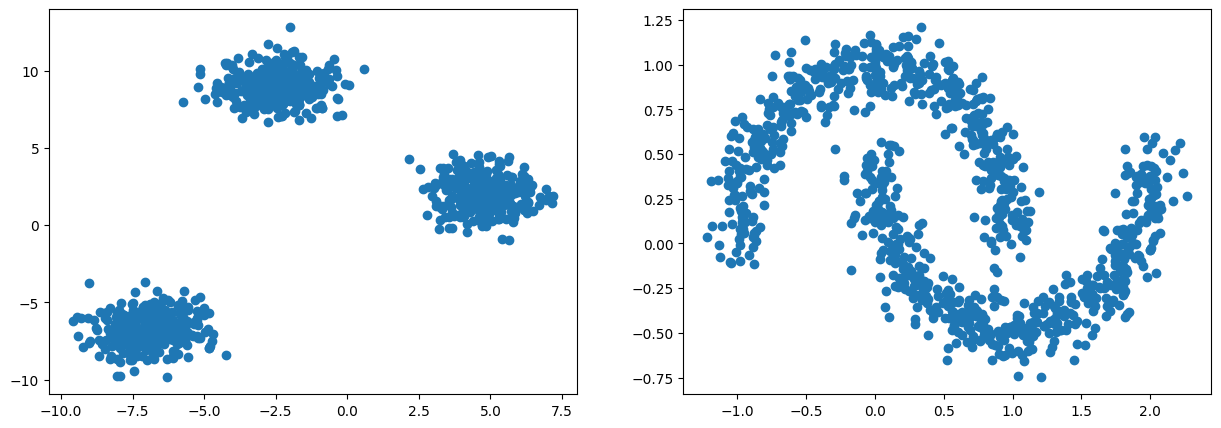

In [28]:
# Data Generation Mechanism:
n_samples = 1000  # Number of samples
n_dimensions = 2  # Number of dimensions
data_blobs = data_generation_mechanism(n_samples, n_dimensions, type='blobs')      # Generate data of type 'blobs'
data_moons = data_generation_mechanism(n_samples, n_dimensions, type='two_moons', add_noise=False)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(data_blobs[:, 0], data_blobs[:, 1], 'o', label='blobs')
ax[1].plot(data_moons[:, 0], data_moons[:, 1], 'o', label='two_moons')
plt.show()

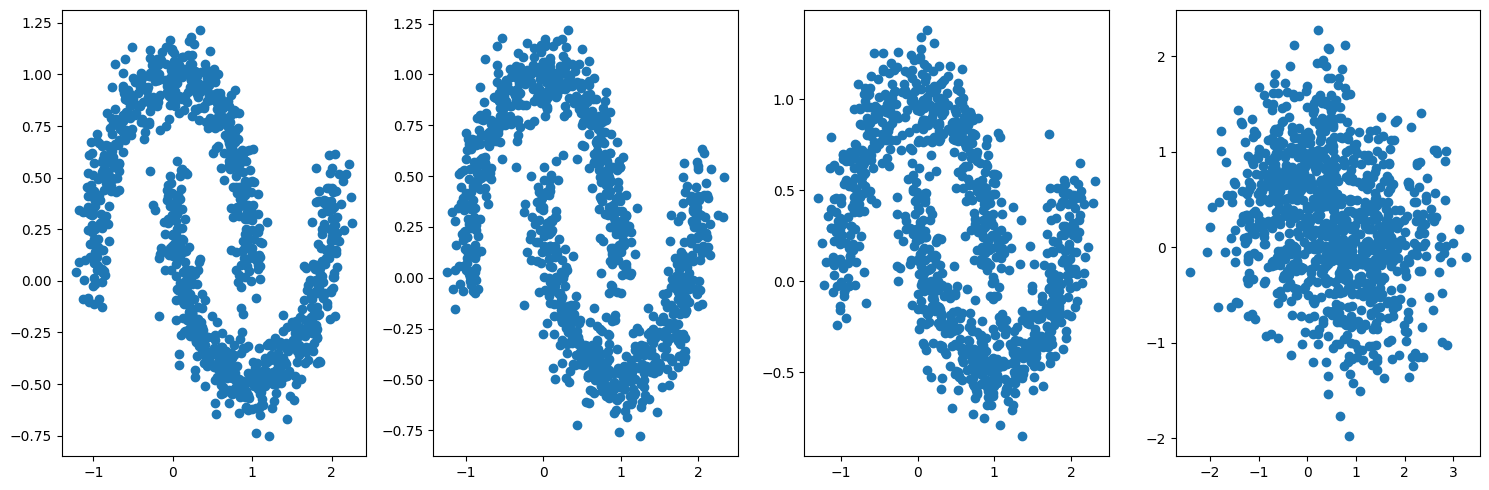

In [29]:
# Generating mechanism + additional noise
noise_levels = [0.01, 0.05, 0.1, 0.5]
fig, axs = plt.subplots(1, len(noise_levels), figsize=(15, 5))
for noise_level, ax in zip(noise_levels, axs):
    data_moons_noise = data_generation_mechanism(n_samples, n_dimensions, type='two_moons', add_noise=True, nose_level=noise_level)
    ax.plot(data_moons_noise[:, 0], data_moons_noise[:, 1], 'o', label=f'two_moons (noise={noise_level})')
plt.tight_layout()
plt.show()

The following code computes and compares the data-enclosing set (convex hull and minimum enclosing sphere) for the two moons dataset. Then, it visualizes the enclosing disk (circle) around the data points along with the convex hull.

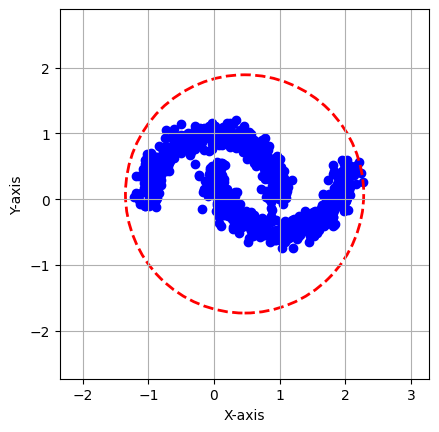

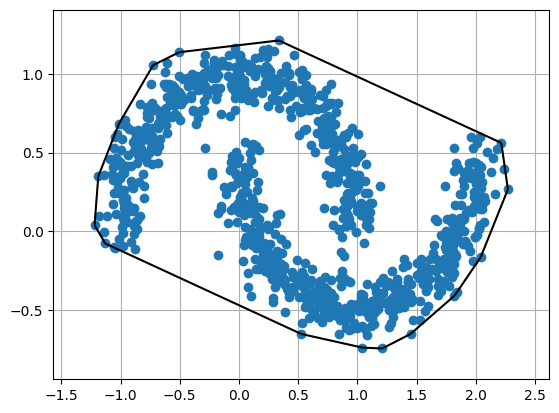

In [33]:
# Find data-enclosing set (convex hull, sphere) for the data
center, radius, hull = data_enclosing_ball(data_moons.tolist())
plot_disk(center, radius, data_moons, show=False)
convex_hull_plot_2d(hull)
plt.grid()
plt.show()

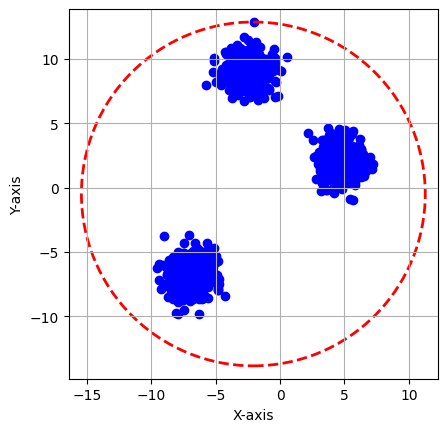

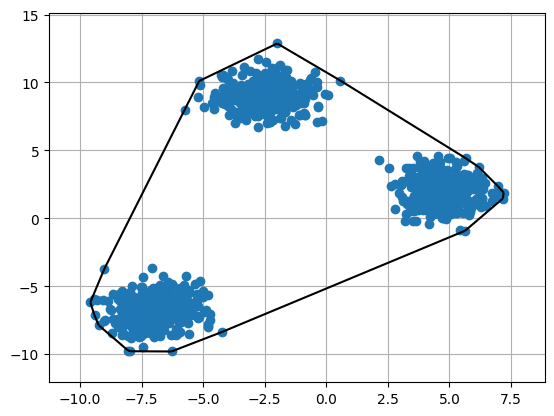

In [32]:
# Find data-enclosing set (convex hull, sphere) for the data
center, radius, hull = data_enclosing_ball(data_blobs.tolist())
plot_disk(center, radius, data_blobs, show=False)
convex_hull_plot_2d(hull)
plt.grid()
plt.show()

## Visualization amd Comparison of models:

**Raw Data:** Displays the actual points generated from the "Two Moons" dataset, which may have non-linear separability.

**GMM Density:** Shows how well the Gaussian Mixture Model approximates the underlying data distribution with Gaussian components.

**KDE Density:** Displays the smooth non-parametric estimate of the data density, showing how KDE adapts to the underlying data without assuming a parametric model.

**Iso-Probability Curves:** Helps compare how GMM and KDE models capture data distributions and their density levels.

In [34]:
def visualize_fitters(data, gmm, bandwidth=0.1, n_grid_points=200):
  # Fit a Gaussian Mixture Model

  # Fit a KDE model
  gmm.fit(data)
  kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
  kde.fit(data)

  # Create a mesh grid for density visualization
  x = np.linspace(min(data[:, 0])-1, max(data[:, 0])+1, n_grid_points)
  y = np.linspace(min(data[:, 1])-1, max(data[:, 1])+1, n_grid_points)
  X, Y = np.meshgrid(x, y)
  grid_points = np.column_stack([X.ravel(), Y.ravel()])

  # Evaluate densities
  gmm_density = np.exp(gmm.score_samples(grid_points)).reshape(X.shape)
  kde_density = np.exp(kde.score_samples(grid_points)).reshape(X.shape)

  # Visualize results
  fig, ax = plt.subplots(2, 3, figsize=(24, 10))

  # Raw data
  ax[0,0].scatter(data[:, 0], data[:, 1], alpha=0.3, label="Data")
  ax[0,0].set_title("Generated Data (Two Moons)")
  ax[0,0].legend()
  ax[1,0].scatter(data[:, 0], data[:, 1], alpha=0.3, label="Data")
  ax[1,0].set_title("Generated Data (Two Moons)")
  ax[1,0].legend()

  # GMM density
  ax[0,1].contourf(X, Y, gmm_density, levels=20, cmap='viridis')
  ax[0,1].scatter(data[:, 0], data[:, 1], alpha=0.5, color="white", edgecolor="k", label="Data")
  ax[0,1].set_title("Gaussian Mixture Model Density")
  ax[0,1].legend()

  # KDE density
  ax[0,2].contourf(X, Y, kde_density, levels=20, cmap='plasma')
  ax[0,2].scatter(data[:, 0], data[:, 1], alpha=0.5, color="white", edgecolor="k", label="Data")
  ax[0,2].set_title("Kernel Density Estimate")
  ax[0,2].legend()

  # Iso-probability density curves
  ax[1,1].contour(X, Y, gmm_density, levels=20, colors='blue', linestyles='solid')
  ax[1,2].contour(X, Y, kde_density, levels=20, colors='red', linestyles='dashed')
  ax[1,1].scatter(data[:, 0], data[:, 1], alpha=0.1, color="black", label="Data")
  ax[1,2].scatter(data[:, 0], data[:, 1], alpha=0.1, color="black", label="Data")
  ax[1,1].set_title("Iso-Probability GMM Curves")
  ax[1,2].set_title("Iso-Probability KDE Curves")
  ax[1,2].legend()
  ax[1,1].legend()

  plt.tight_layout()
  plt.show()


## Evaluating Log-Likelihood with Different KDE Bandwidths

We evaluate the performance of KDE with two different bandwidth values and calculate the log-likelihood for each:

*   **Bandwidth 1**: Wider bandwidth.
*   **Bandwidth 2**: Narrower bandwidth.


The log-likelihood gives us insight into how well the KDE fits the data based on different smoothing levels.

In [35]:
bandwidth1, bandwidth2 = 1, .2

kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth1)
kde.fit(data_moons)
log_likelihood_model_1 = sum(kde.score_samples(data_moons))
print(f"Likelihood KDE with bandwidth {bandwidth1} is {log_likelihood_model_1}")

kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth2)
kde.fit(data_moons)
log_likelihood_model_2 = sum(kde.score_samples(data_moons))
print(f"Likelihood KDE with bandwidth {bandwidth2} is {log_likelihood_model_2}")



Likelihood KDE with bandwidth 1 is -2541.1341336341325
Likelihood KDE with bandwidth 0.2 is -1404.246937874331


We fit a Gaussian Mixture Model (GMM) with different configurations (5 components for the 'two moons' dataset and 2 components for the 'blobs' dataset) and visualize the fitted models.

This allows us to compare how GMM handles different data structures and how well it models the data in terms of mixture components.



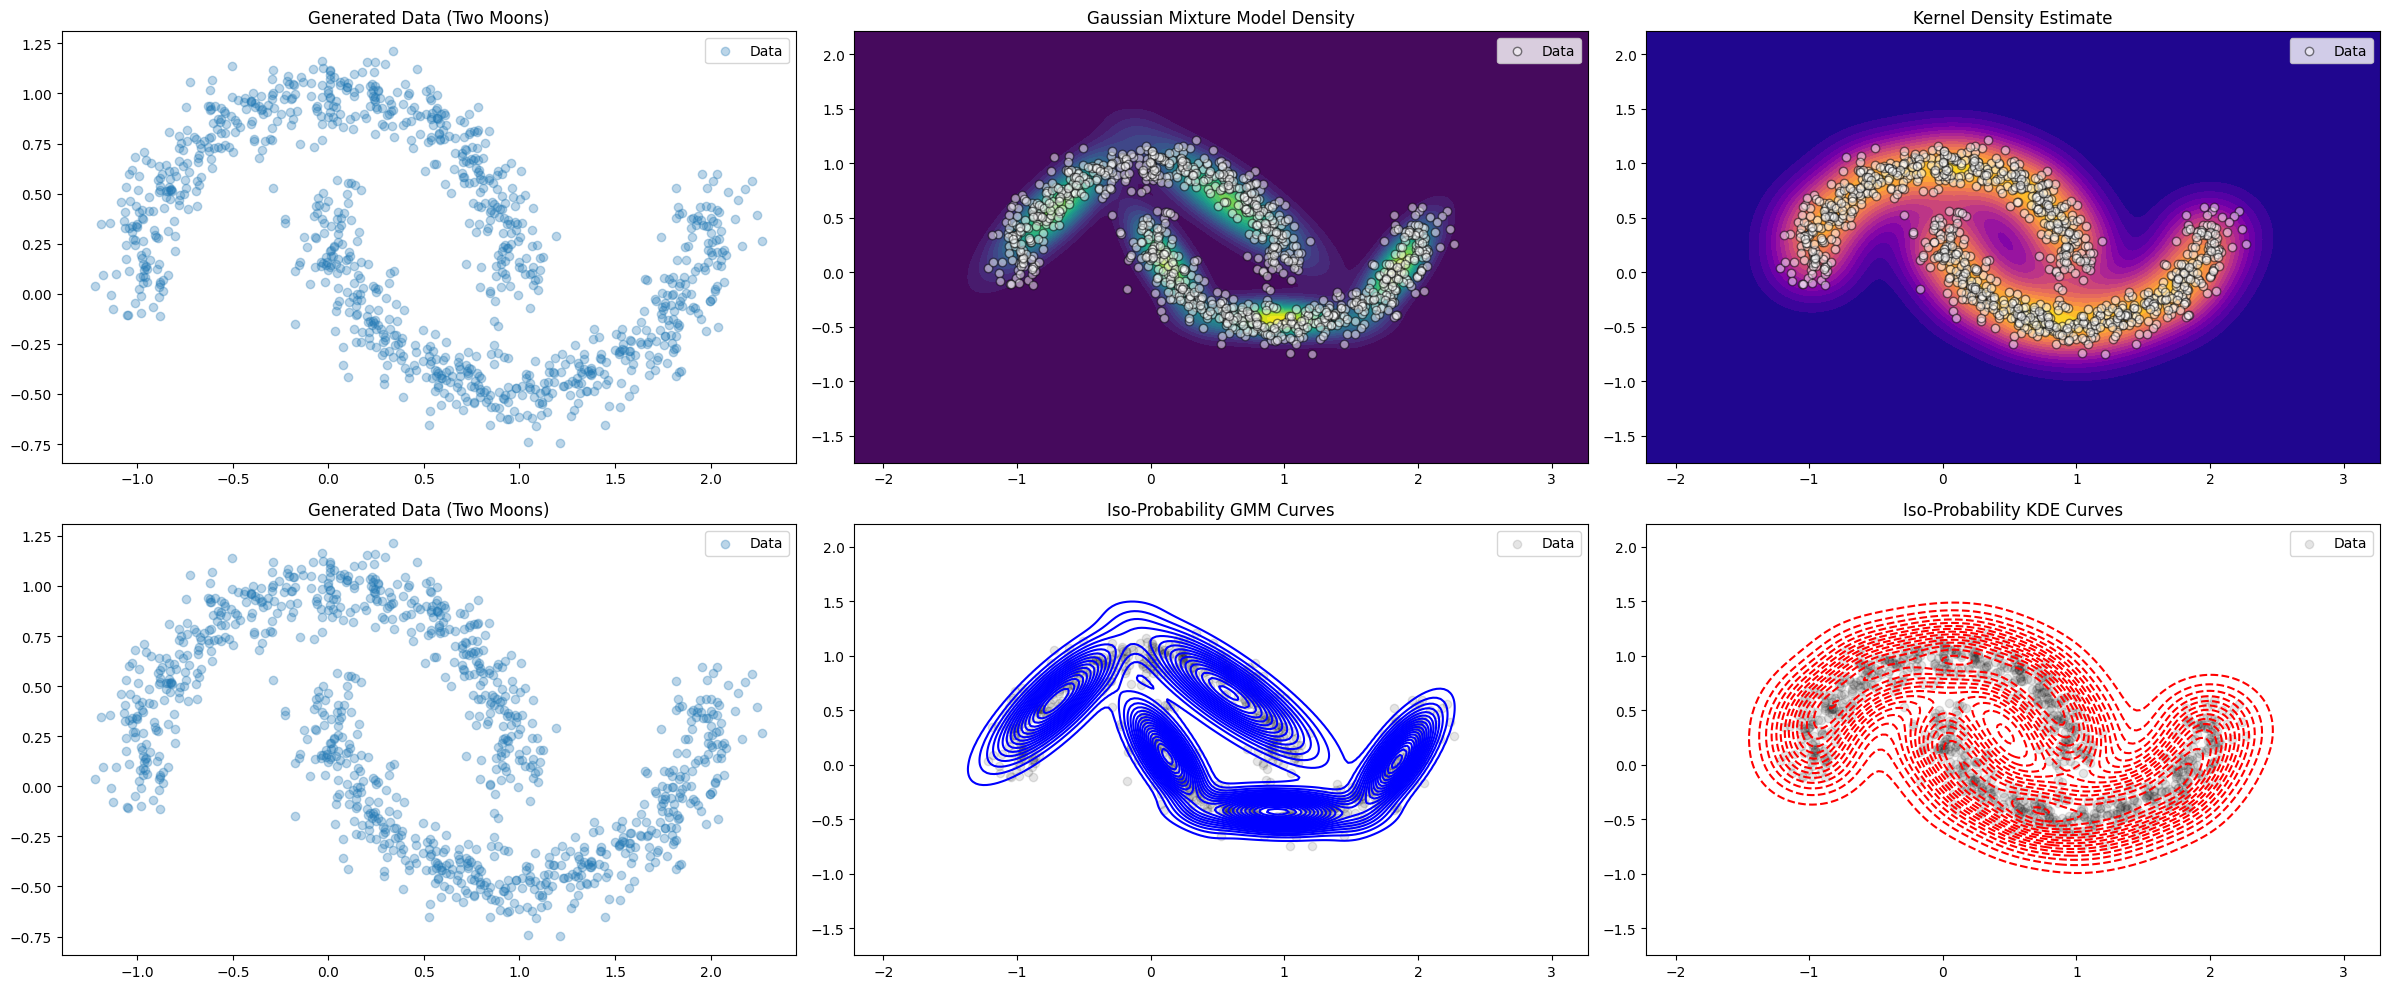

In [36]:
gmm_moons= GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm_moons.fit(data_moons)
visualize_fitters(data=data_moons, gmm=gmm_moons, bandwidth=.2)

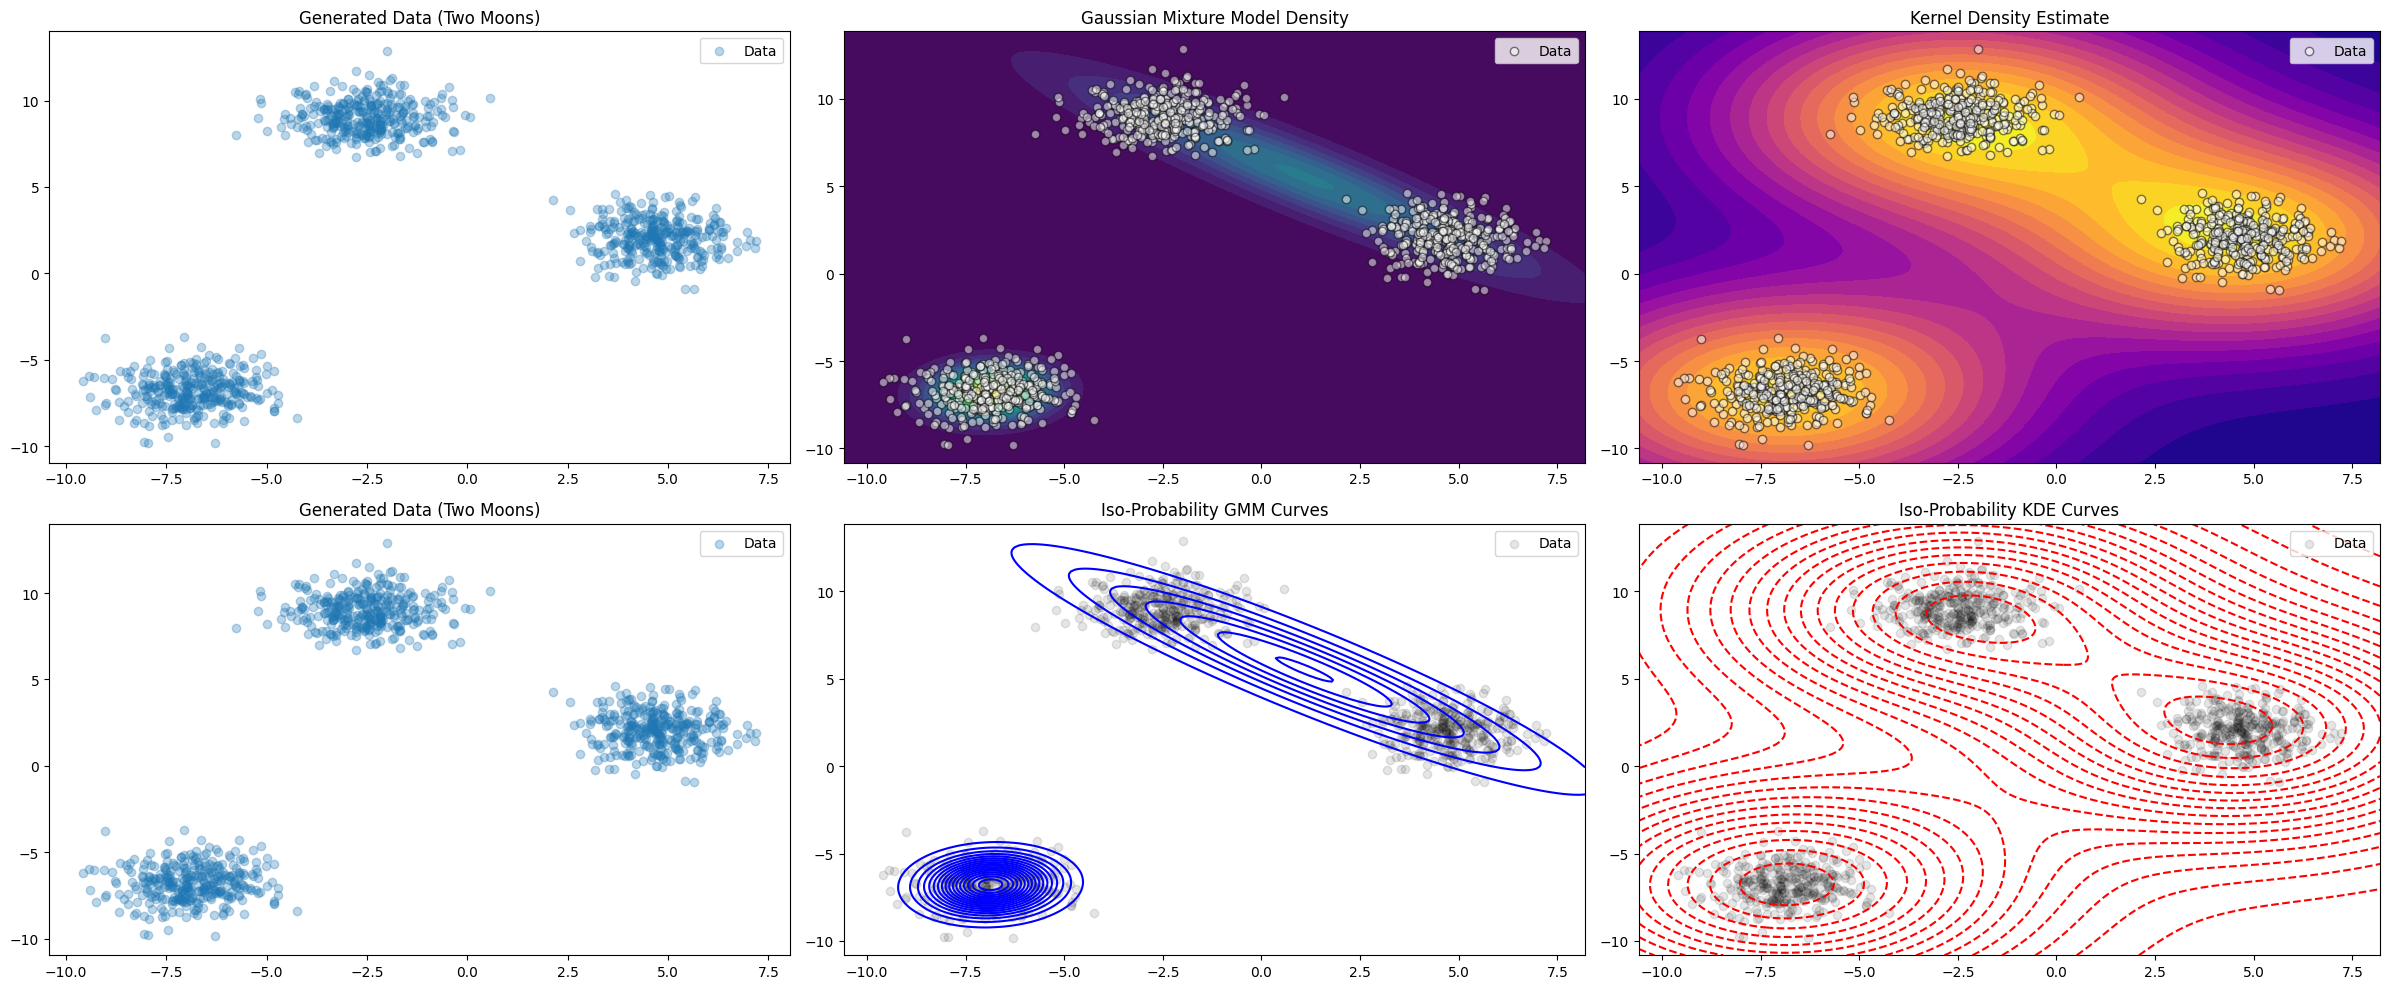

In [37]:
gmm_blobs= GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm_blobs.fit(data_blobs)
visualize_fitters(data=data_blobs, gmm=gmm_blobs, bandwidth=4)

**Epistemic Sets: Removed Samples & Data Enclosing Sets**

In this section, we examine how **data enclosing sets** change when we progressively remove samples from the dataset. This allows us to explore the concept of **epistemic uncertainty** and how the data distribution adapts as we eliminate certain points.

We consider several **reject percentages** to observe the evolution of both:

- **Convex Hull**: The smallest convex boundary that encloses all data points.
- **Data Enclosing Disk**: A disk that encloses the data points, with its center and radius.

We also add **noise** to the data to investigate how the enclosing sets respond under different noise levels.


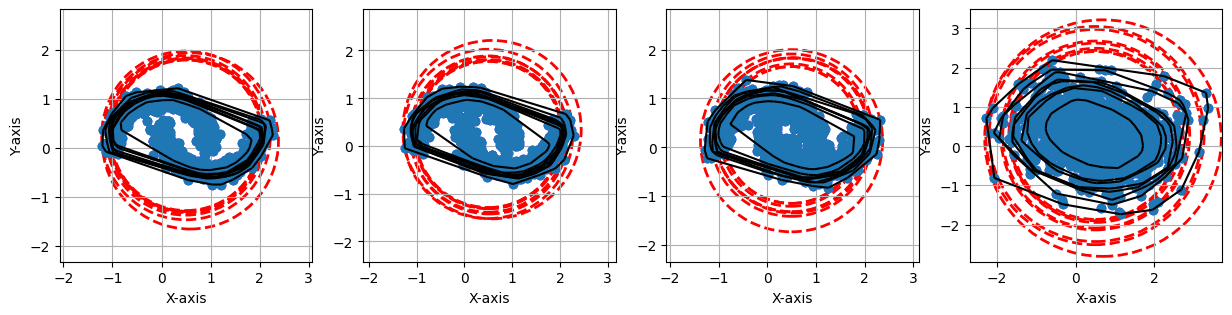

Center of data enclosing disk: [0.51312479 0.2741696 ]
Radius of data enclosing disk: 2.216107439064847
Area:
data enclosing disk: 15.420955049842664
convex hull: 6.52381853550661


In [38]:
# Epistemic sets with removed samples
reject_percentages = [0, 2, 4, 8, 10, 15, 20, 50]
fig, axs = plt.subplots(1, len(noise_levels), figsize=(15, 5))

for noise_level, ax in zip(noise_levels, axs):
    data_moons_noise = data_generation_mechanism(n_samples, n_dimensions,
                                                  type='two_moons',
                                                  add_noise=True,
                                                  nose_level=noise_level)

    for i_r, reject_percentage in enumerate(reject_percentages):
        center, radius, hull = data_enclosing_ball(data_moons_noise.tolist(), reject_percentage=reject_percentage)
        if i_r == 0:
            plot_disk(center, radius, data_moons_noise, ax=ax, show=False)
            convex_hull_plot_2d(hull, ax=ax)
        else:
            line_segments = [hull.points[simplex] for simplex in hull.simplices]
            ax.add_collection(LineCollection(line_segments,
                                              colors='k',
                                              linestyle='solid'))
            plot_disk(center, radius, None, ax=ax, show=False)
plt.show()



print("Center of data enclosing disk:", center)
print("Radius of data enclosing disk:", radius)
print("Area:")
print("data enclosing disk:", 3.14*radius**2)
print("convex hull:", hull.area)